# Røngtendiffraktion

Nedenfor er defineret en funktion "læs_data" som kan læse data fra detektoren. Brug den til at læse mca filerne. Desuden importerer vi de pakker vi skal bruge

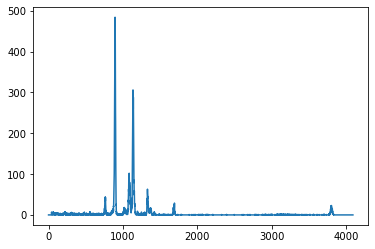

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def læs_data(filnavn):
    with open(filnavn, errors='ignore') as f:
        data = np.array(f.readlines()[12:-73]).astype(int)
        return np.arange(len(data)), data

# eksempel:
n, signal = læs_data('data/Am241.mca')
plt.plot(n, signal)

### Del 1: Kalibrer energier til kanaler
Nu skal vi kallibrere kanalerne, altså finde ud af hvilke energier kanalerne svarer til. Vi har slået op at Americum 241 formentligt vil vise peaks ved energierne listet i arrayet "energier" som står i blokken nedenfor. Så dem vil vi gerne match op med kanalerne ovenfor. Så for at gøre det:
- For hver af energierne i listen, lav en lodret streg i plottet ved den energi. Hint: hvis "energi" er en energi hvorved vi vil lave en lodret streg er det smart as skrive "plt.axvline(energi, color = 'k', linewidth = 0.5)". Det skal vi så gøre for hver energi.
- Hver kanal svarer til en energi, men vi ved ikke hvilken. Hvad vi ved er at vi kan skrive $E=E_0\cdot n$ hvor $E$ er den faktiske energi for en kanal og $n$ er kanal nummeret, så vi skal altså finde $E_0$, "oversættelsen" mellem kanal nummer og energi. Skriv funktionsforholdet for E og Plot det målte data sammen med energistregerne. Når i gør dette skal i justere E0 så at stregerne kommer til at ligge oven i peaksne.

In [11]:

#Energier af Am241 resonanser i keV
energier = np.array([11.871, 13.9, 16.84, 17.7502, 20.7848, 26.3446, 59.5409]) 

...

Ellipsis

### Del 2: Kalibrer koncentrationer 
Først, plot signalet for de 2 målte Jern/nikkel materialer, og zoom ind så plottet bliver "pænt". Tilføj også en signaturforklaring (legend). Hvordan adskiller de 2 plot sig?

In [12]:
...

Ellipsis

For at finde ud af hvor meget Jern og Nikkel der er i et materiale skal vi altså se på hvordan arealet af bumpene ændrer sig. Ud fra teori kan man vise at formen af hvert bump går som $I(E)=A\exp\left(\left(\frac{E-E_i}{2\sigma}\right)^2\right)$, og arealet er så $\int_{-\infty}^{\infty}I(E)dE=A\sqrt{\frac{\pi}{|\sigma|}}$. Hvis vi fitter $I(E)$ med curve_fit som vi lærte til nummerisk fysik, kan vi altså sætte $A$ og $\sigma$ ind i formlen, og få arealet ufatteligt præcist. 

Når vi kun ønsker at fitte til et enkelt peak og ikke hele datasættet skal vi hjælpe curve_fit. Det gør vi ved at gøre 2 ting: 
- For det første skal vi klippe kun det bump ud som vi ønsker at fitte til, så curve_fit ikke bliver forvirret at alt muligt andet. Til det formål har vi givet funktionen "klip_data" nedenfor (test den ved at plotte det klippede data sammen med hele datasættet som ovenfor)

- For det andet, curve_fit prøver som udgangspunkt et fit centreret om E=0, og justerer så mod det bedste svar. Men hvis data faktisk er centreret i fx E=7 kan den ikke finde ud af det. Så det kan være smart at fotælle curvfit hvor den skal starte med at gætte. Dette gør man ved at skrive curve_fit(funktion,x_data,y_data,p0=[a1, a2, a3,...]) hvor a1, a2 og a3 er startgæt på de forskellige fittingparametre. Kommer man med et okay gæt virker curvefit!

Så nu har vi altså kode til at bestemme arealet af hver peak. Hvis vi gør det for 1 peak der tilsvarer jern og 1 der tilsvarer nikkel, kan vi altså bestemme forholdet imellem de to. Vælg to peaks, og udregn areal forholdet for hver af de to kendte materialer.

In [9]:
# Funktion til at klippe data ud 
def klip_data(energier, signal, fra, til):
    fltr = (energier > fra) & (energier < til)
    return energier[fltr], signal[fltr]
energier_klippet, signal_klippet = klip_data(n*E0, signal, 6.3, 6.7)
# plot klippet data oven på rå data:
...

NameError: name 'E0' is not defined

Udregn arealforhold for 50/50 materiale:

In [ ]:
...

Udregn arealforhold for 64/34 materiale:

In [1]:
...

Ellipsis

Hvad vil vi forvente at arealforholdet er hvis materialet er 0% jern og 100% nikkel? Med den tanke har vi nu 3 datapunkter (Fe/Ni forhold på x-aksen, bump højde forhold på y-aksen) som vi kan plotte. Hvad ser vi?

In [2]:
koncentration_forhold = ...
areal_forhold = ...
# Koden nedenfor plotter jeres data og laver et linært fit
plt.scatter(koncentration_forhold,areal_forhold)
a, b = np.polyfit(koncentration_forhold,areal_forhold, 1)
plt.plot(koncentration_forhold, koncentration_forhold*a+b)

NameError: name 'plt' is not defined

### Del 3: Ukendt materiale
Nu er vi endeligt i stand til at analysere nye materialer. Ved at måle forholdet mellem bump arealerne for et nyt materiale, kan vi aflæse på plottet ovenfor hvilken koncentration forhold det svarer til. Gør det for jeres målte data!